# Identify the measures that we want to use from the data set by running correlation matricies 

### Import CSV files for State and County and get them into a Panda Dataframe

In [1]:
#import dependancies
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import shapiro

In [2]:
# Import CSV filepath
county_data = pd.read_csv('Resources/county_data.csv')
county_df = pd.DataFrame(county_data)

state_data = pd.read_csv('Resources/state_data.csv')
state_df = pd.DataFrame(state_data)

#show sample of county dataframe
county_df.sample(7)

,fips,state,county,adult_obesity_pct,adult_obesity_z,food_environment_index,food_environment_index_z,exercise_access_pct,exercise_access_z,excess_drinking_pct,...,poor_phys_health_z,poor_mental_health_z,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
2735,48411,Texas,San Saba,38.1,0.154515,6.5,0.904664,50.663176,0.495393,17.589894,...,0.551226,0.433489,5824:1,1.0,17.17033,79.0,3.531515,4.260651,1.405152,3.466042
2577,48095,Texas,Concho,37.3,-0.021188,6.7,0.734845,66.212534,-0.188622,16.087584,...,0.317486,0.176485,3340:1,1.0,29.94012,42.0,3.148426,4.109635,2.171429,1.600000
3030,54061,West Virginia,Monongalia,34.7,-0.592220,8.3,-0.623707,75.929391,-0.616066,15.657985,...,-0.079886,1.250332,717:1,149.0,139.42303,1894.0,3.409541,3.852900,0.397664,1.478812
1759,32013,Nevada,Humboldt,35.4,-0.438481,8.3,-0.623707,51.200463,0.471757,18.113188,...,0.628075,0.785527,2467:1,7.0,40.52802,257.0,3.320842,4.310302,0.379939,5.091185
1913,37035,North Carolina,Catawba,36.0,-0.306704,7.3,0.225388,56.010211,0.260177,17.895349,...,-0.321470,-0.256727,1618:1,101.0,61.78806,2737.0,3.435076,3.696816,0.850016,2.764538
2774,48489,Texas,Willacy,45.3,1.735836,4.0,3.027402,62.333862,-0.018000,16.311056,...,1.657438,0.001133,20143:1,1.0,4.96450,591.0,8.177667,4.975357,2.891156,12.244898
794,18183,Indiana,Whitley,36.7,-0.152964,8.9,-1.133164,54.075634,0.345279,16.896916,...,-0.274731,-0.342232,2164:1,16.0,46.20672,432.0,2.416513,3.727013,0.318379,0.499276


In [3]:
#show sample of state dataframe
state_df.sample(7)

,fips,state,adult_obesity_pct,food_environment_index,exercise_access_pct,excess_drinking_pct,uninsured_num,uninsured_pct,primary_care_phys_rate,prevent_hospital_rate,...,mental_health_rate,mental_health_num,dentists_ratio,dentists_num,dentists_rate,unemployment_num,unemployment_pct,poor_physical_health_avg_days,housing_inad_facil,housing_overcrowding
23,27000,Minnesota,32.4,9.1,86.427305,20.758391,247589.0,5.298654,88.18392,2225.0,...,335.25246,19167.0,1287:1,4441.0,77.67810,82583.0,2.683437,2.721412,0.797105,2.266994
34,38000,North Dakota,35.7,9.1,76.463174,22.999314,57728.0,9.190118,77.29551,2945.0,...,223.41680,1741.0,1425:1,547.0,70.19471,8736.0,2.108505,3.108850,0.919361,2.151928
8,11000,District of Columbia,24.5,8.5,100.000000,24.194509,20443.0,3.726775,128.79636,3273.0,...,688.29702,4624.0,775:1,867.0,129.05569,18174.0,4.679161,2.729888,0.711053,3.628102
43,48000,Texas,36.2,5.9,81.801036,18.250380,5082397.0,20.319019,60.34285,2933.0,...,156.71219,47060.0,1590:1,18892.0,62.91132,569731.0,3.885614,3.293681,0.989898,4.742092
9,12000,Florida,28.3,7.2,87.471550,17.180965,2534999.0,15.098287,73.01275,3035.0,...,205.74675,45768.0,1563:1,14229.0,63.96544,313268.0,2.910788,2.969398,0.836557,2.972143
29,33000,New Hampshire,31.2,9.5,84.994436,18.552966,69294.0,6.323611,87.04154,2478.0,...,380.58214,5310.0,1302:1,1072.0,76.83316,19332.0,2.521541,2.999071,0.965471,1.465365
33,37000,North Carolina,36.4,6.8,73.366753,18.240409,1056777.0,12.469280,70.78841,2838.0,...,315.22652,33726.0,1634:1,6548.0,61.20214,188335.0,3.650374,3.260787,0.747100,2.233114


### Let's find what metrics have correlation with a correlation heatmap - COUNTY LEVEL

<Axes: >

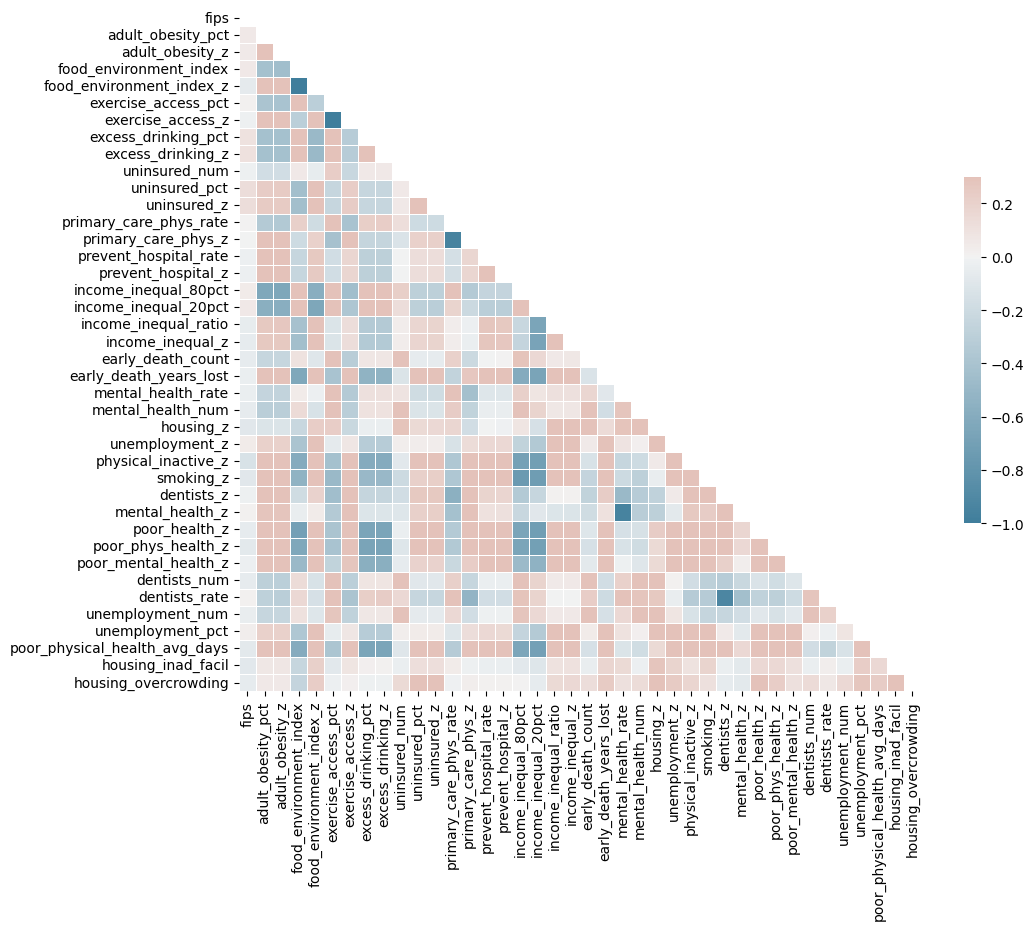

In [4]:
# Select only numerical columns to avoid errors on string values
numerical_df = county_df.select_dtypes(include=['number'])

# Compute the correlation matrix using the filtered numerical dataframe
corr = numerical_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [5]:
#Comment on Findings from the total correlation analysis
print(f'Definitely seeing some correlation within the measures! Next, narrow down the measures to see further correlations vs Early Death Years Loss, as this measure that is seemingly an output of the factor groupings.') 

Definitely seeing some correlation within the measures! Next, narrow down the measures to see further correlations vs Early Death Years Loss, as this measure that is seemingly an output of the factor groupings.


### Let's break this correlation analysis down further into groupings for health, socioeconomic and environmental factors

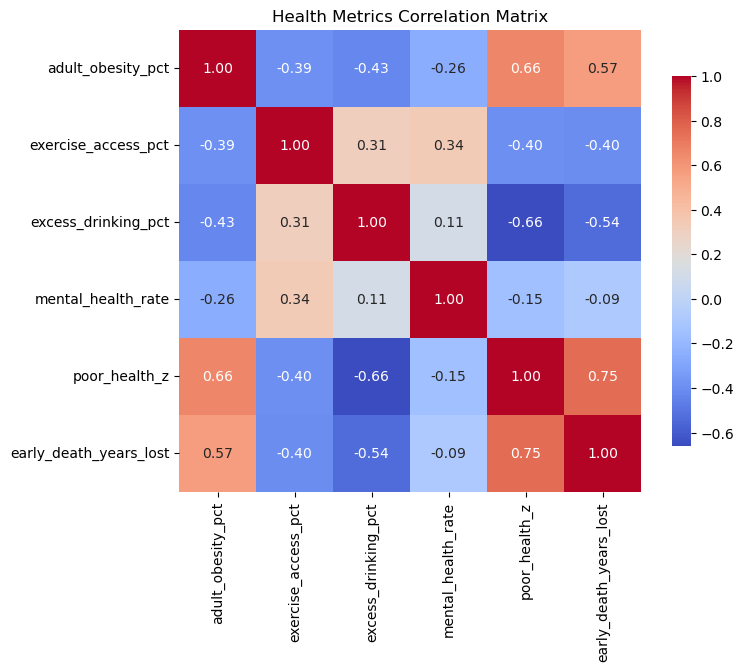

In [6]:
# Group the metrics into the corresponding factor subsets

health_metrics = ['adult_obesity_pct', 'exercise_access_pct', 'excess_drinking_pct', 'mental_health_rate', 'poor_health_z','early_death_years_lost']
socioeconomic_factors = ['uninsured_pct', 'income_inequal_80pct', 'income_inequal_20pct', 'income_inequal_ratio', 'unemployment_pct','early_death_years_lost']
environmental_factors = ['food_environment_index', 'housing_overcrowding', 'housing_z','early_death_years_lost']

# Create smaller correlation matrices
health_corr = corr.loc[health_metrics, health_metrics]
socioeconomic_corr = corr.loc[socioeconomic_factors, socioeconomic_factors]
environmental_corr = corr.loc[environmental_factors, environmental_factors]

# Function to plot heatmap
def plot_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(title)
    plt.show()

# Plot each heatmap
plot_heatmap(health_corr, 'Health Metrics Correlation Matrix')


In [7]:
#Comments on Analysis from the Health Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Death Years Lost: Poor Health, Excess Drinking, Adult Obesity ')

Selected Metrics for further analysis vs Early Death Years Lost: Poor Health, Excess Drinking, Adult Obesity 


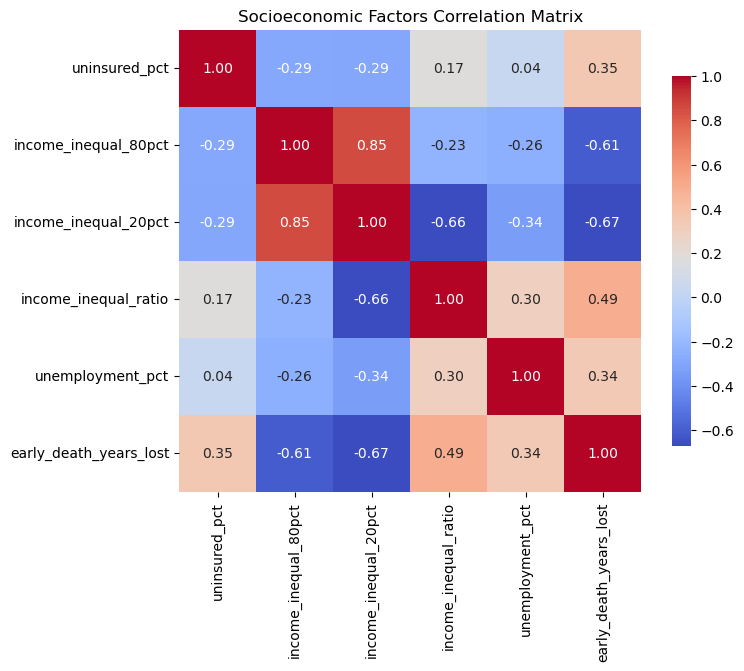

In [8]:
# Socioeconomic Factor Correlation Matrix
plot_heatmap(socioeconomic_corr, 'Socioeconomic Factors Correlation Matrix')


In [9]:
#Comments on Analysis from the Socioeconomic Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Death Years Lost: Income Inequal Ratio, Income Inequal 80ct, Income Inequal 20pct ')

Selected Metrics for further analysis vs Early Death Years Lost: Income Inequal Ratio, Income Inequal 80ct, Income Inequal 20pct 


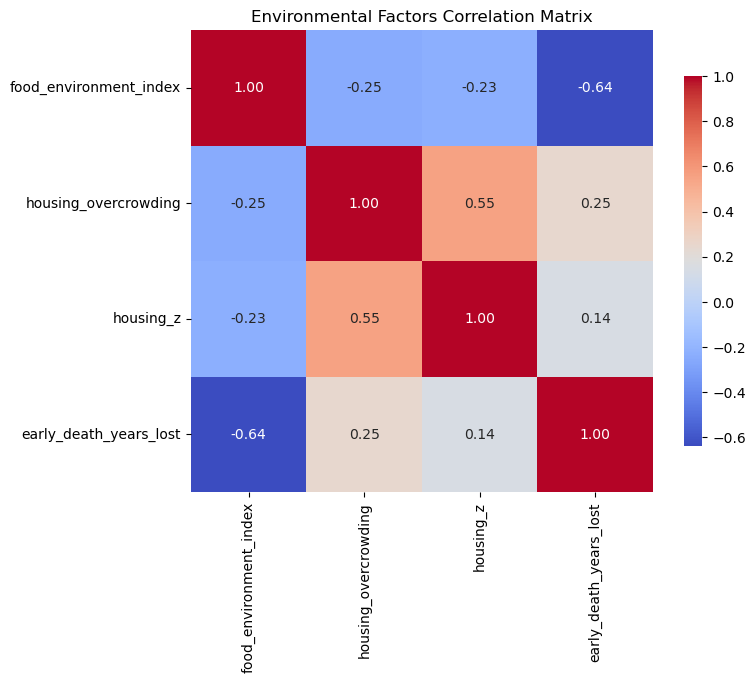

In [10]:
# Environmental Factor Correlation Matrix
plot_heatmap(environmental_corr, 'Environmental Factors Correlation Matrix')

In [11]:
#Comments on Analysis from the Environmental Factor Correlation Matrix
print(f'Selected Metrics for further analysis vs Early Death Years Lost: Food Environment Index ')

Selected Metrics for further analysis vs Early Death Years Lost: Food Environment Index 


## County Level Scatter Plots, Correlation and Hypothesis Testing

###  Continue comparting the selected metrics vs Early Death Year Lost by executing scatter plots, r^2 values and hypothesis testing through identifying normal distribution

In [12]:
# Drop NAN values in the dataset before beginning analysis
county_df= county_df.dropna().copy()


# Define a function to create Linear Regression plots
def cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel):
    # Set parameters
    x = x_values  
    y = y_values
    
    # Get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"The r² value is {round(r**2, 3)}")

    # Plot data points
    plt.scatter(x, y, label='County Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')

    # Set labels
    plt.title(f"{cool_xlabel} vs {cool_ylabel}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), equation_text, fontsize=12, color='red')

    plt.show()

#Define a Function to determine if the x and y values are normally distributed to determine which hypothesis testing model to move forward with
def correlation_function(x_values, y_values):
    # Perform the Shapiro-Wilk test for normality
    stat_x, p_value_x = shapiro(x_values)
    stat_y, p_value_y = shapiro(y_values)

    # Check if both x and y are normally distributed
    if p_value_x > 0.05 and p_value_y > 0.05:
        # Use Pearson correlation
        correlation, p_value = pearsonr(x_values, y_values)
        correlation_type = "Pearson"
    else:
        # Use Spearman correlation
        correlation, p_value = spearmanr(x_values, y_values)
        correlation_type = "Spearman"
    
    # Return results
    return correlation, p_value, correlation_type


# County Level Statistically Signifigant Correlations

#### County Physical Health vs Early Death Years Lost

The r² value is 0.533


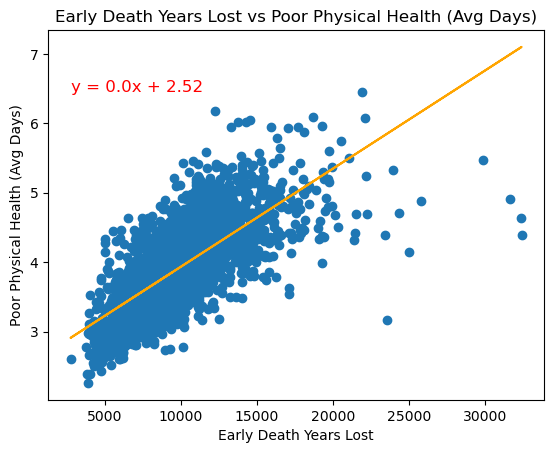

Spearman correlation: 0.7757, p-value: 0.0
The correlation is statistically significant!


In [13]:
# Set x and y values and labels
x_values = county_df["early_death_years_lost"]
y_values = county_df["poor_physical_health_avg_days"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Poor Physical Health (Avg Days)"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")


#### Income Inequal 20% vs Early Death Years Lost

The r² value is 0.465


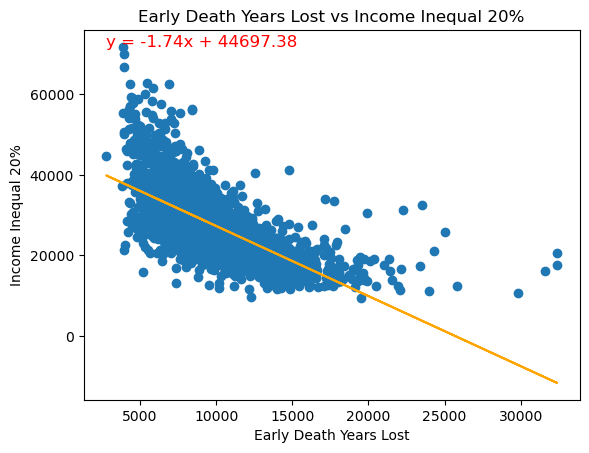

Spearman correlation: -0.7528, p-value: 0.0
The correlation is statistically significant!


In [38]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["income_inequal_20pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Income Inequal 20%"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### Income Inequal 80% vs Early Death Years Lost

The r² value is 0.389


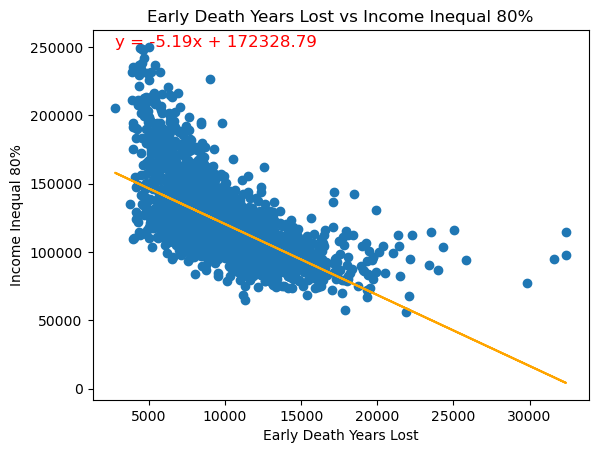

Spearman correlation: -0.7028, p-value: 0.0
The correlation is statistically significant!


In [39]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["income_inequal_80pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Income Inequal 80%"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### County Food Environment Index vs Early Death Year Lost

The r² value is 0.43


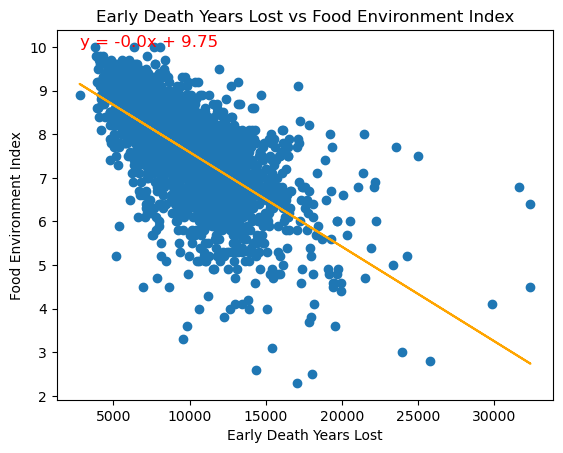

Spearman correlation: -0.6995, p-value: 0.0
The correlation is statistically significant!


In [40]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["food_environment_index"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Food Environment Index"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### Adult Obesity vs Early Death Years Lost

The r² value is 0.32


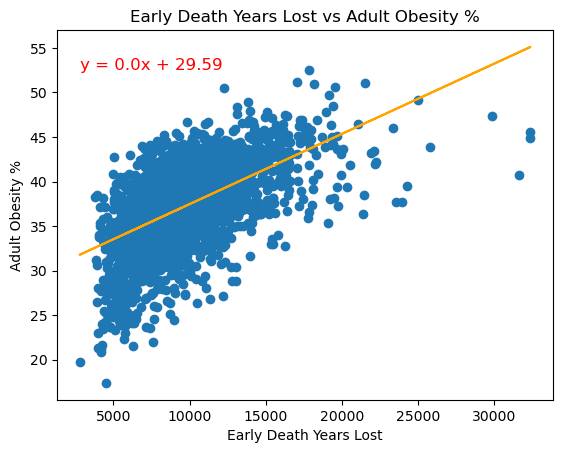

Spearman correlation: 0.569, p-value: 0.0
The correlation is statistically significant!


In [41]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["adult_obesity_pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Adult Obesity %"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### County Excercise Access Percent vs Early Death Year Lost

The r² value is 0.172


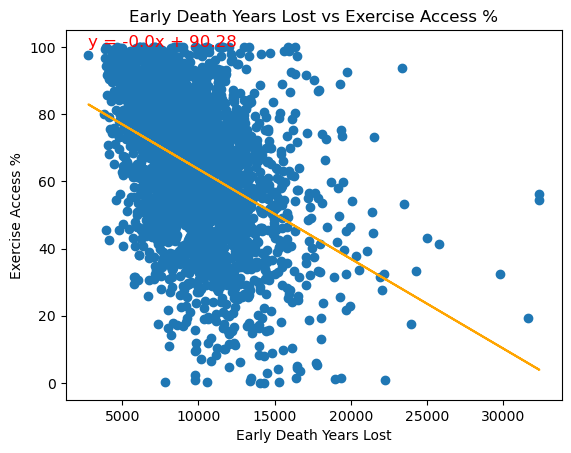

Spearman correlation: -0.4232, p-value: 0.0
The correlation is statistically significant!


In [35]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["exercise_access_pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Exercise Access %"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### County Mental Health vs Early Death Years Lost

The r² value is 0.005


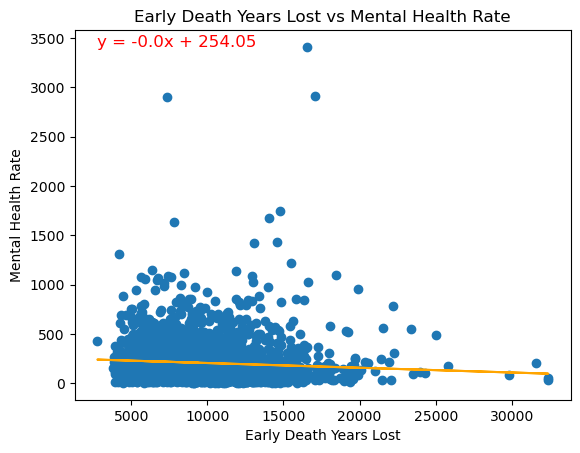

Spearman correlation: -0.1934, p-value: 0.0
The correlation is statistically significant!


In [37]:
# Set x and y values and labels

x_values = county_df["early_death_years_lost"]
y_values = county_df["mental_health_rate"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Mental Health Rate"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")


## ADD IN SOME MORE MEASURES THAT DIDN'T HAVE STRONG CORRELATION FROM INITIAL ANALYSIS: PRIMARY CARE PHYSICIAN RATE, EXCESS DRINKING

### TYPE UP COUNTY FINDINGS AND THE NEED TO TRANSITION INTO STATE DATA

# State Analysis : what does this look like at a state level for correlation?

### Let's find what metrics have correlation with a correlation heatmap - STATE LEVEL

<Axes: >

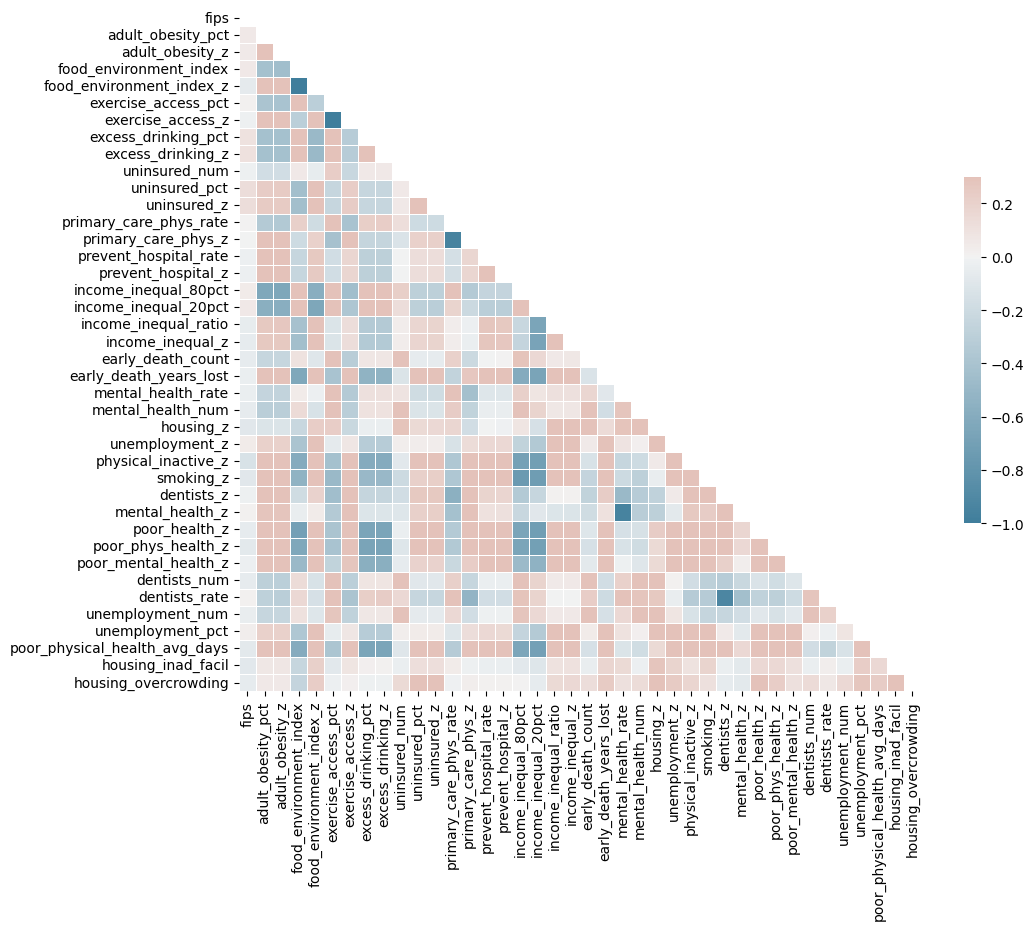

In [20]:
# Select only numerical columns to avoid errors on string values
numerical_df_state = state_df.select_dtypes(include=['number'])

# Compute the correlation matrix using the filtered numerical dataframe
corr_state = numerical_df_state.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## ADD GROUPED CORRELATION CHARTS FROM ABOVE COUNTY ANALYSIS

## State Level Scatter Plots, Correlation and Hypothesis Testing

In [22]:
# Define a function to create Linear Regression plots
def cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel):
    # Set parameters
    x = x_values  
    y = y_values
    
    # Get all the needed data
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    print(f"The r² value is {round(r**2, 3)}")

    # Plot data points
    plt.scatter(x, y, label='State Data')

    # Apply our model
    regression_line = slope * x + intercept
    plt.plot(x, regression_line, color='orange', label='Regression line')

    # Set labels
    plt.title(f"{cool_xlabel} vs {cool_ylabel}")
    plt.xlabel(cool_xlabel)
    plt.ylabel(cool_ylabel)

    # Add the equation used for the regression line
    equation_text = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.text(x.min(), y.max(), equation_text, fontsize=12, color='red')

    plt.show()

#### State Food Environment Index vs Early Death Years Lost

The r² value is 0.695


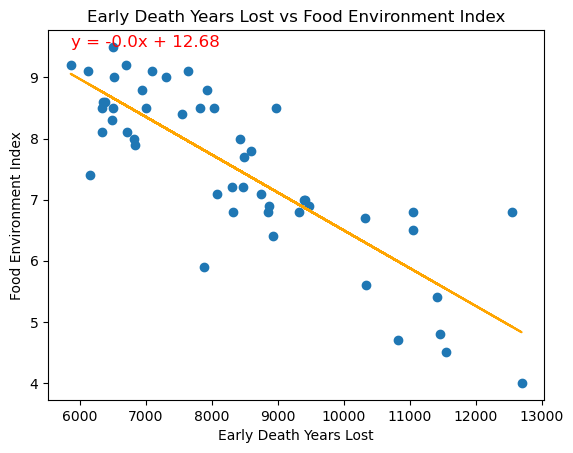

Spearman correlation: -0.8077, p-value: 0.0
The correlation is statistically significant!


In [23]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["food_environment_index"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Food Environment Index"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### Income Inequal 20% vs Early Death Years Lost

The r² value is 0.637


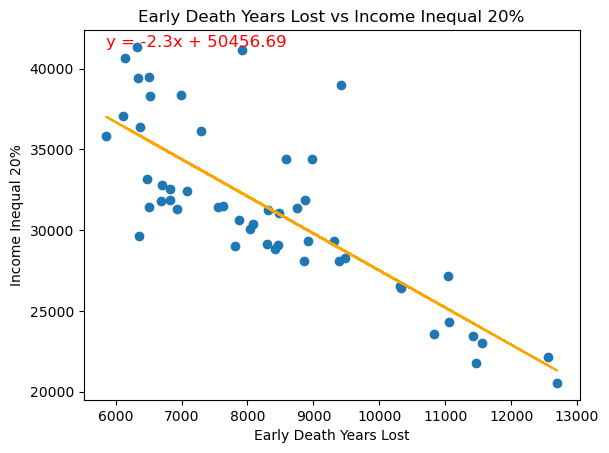

Spearman correlation: -0.7744, p-value: 0.0
The correlation is statistically significant!


In [25]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["income_inequal_20pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Income Inequal 20%"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### State Income Inequal 80% vs Early Death Years Lost

The r² value is 0.403


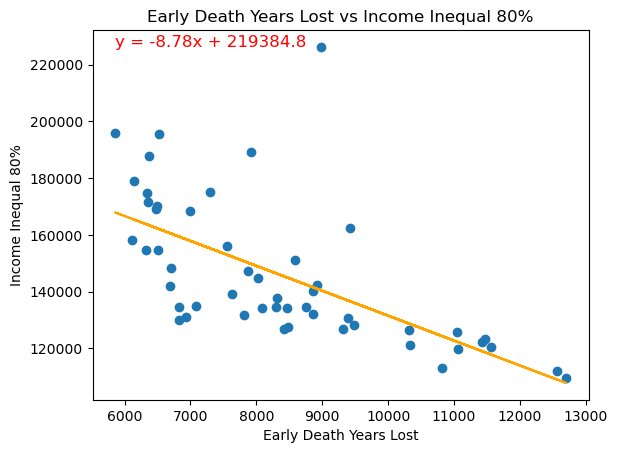

Spearman correlation: -0.757, p-value: 0.0
The correlation is statistically significant!


In [26]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["income_inequal_80pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Income Inequal 80%"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### State Adult Obesity % vs Early Death Years Lost

The r² value is 0.505


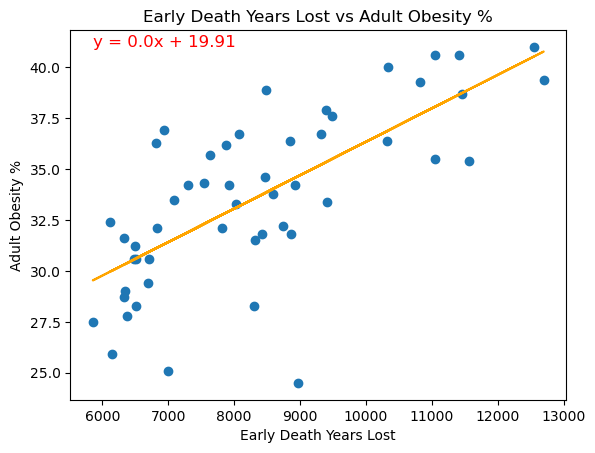

Spearman correlation: 0.7132, p-value: 0.0
The correlation is statistically significant!


In [27]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["adult_obesity_pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Adult Obesity %"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### State Poor Physical Health (Avg Days) vs Early Death Years Lost

The r² value is 0.543


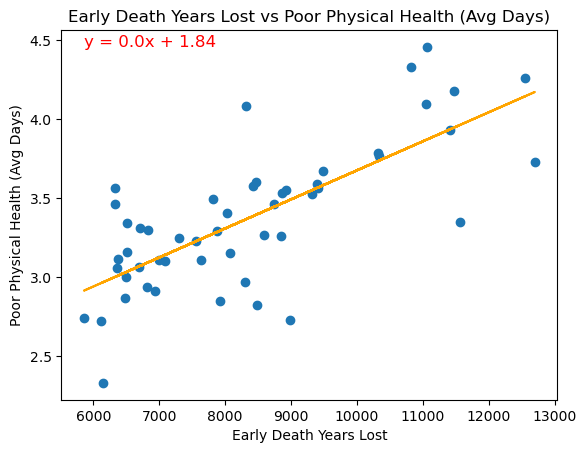

Spearman correlation: 0.6972, p-value: 0.0
The correlation is statistically significant!


In [33]:
# Set x and y values and labels
x_values = state_df["early_death_years_lost"]
y_values = state_df["poor_physical_health_avg_days"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Poor Physical Health (Avg Days)"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### State Exercise Access % vs Early Death Years Lost

The r² value is 0.55


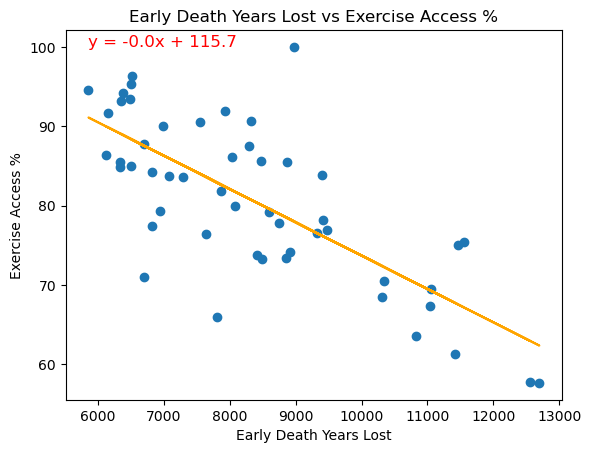

Spearman correlation: -0.6877, p-value: 0.0
The correlation is statistically significant!


In [28]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["exercise_access_pct"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Exercise Access %"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

#### State Mental Health Rate vs Early Death Years Lost

The r² value is 0.111


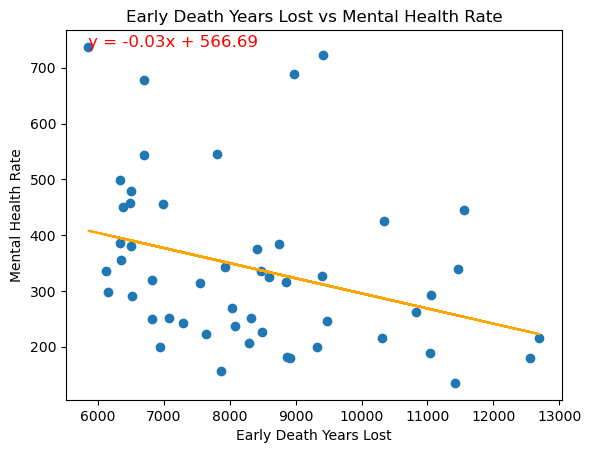

Spearman correlation: -0.3997, p-value: 0.0037
The correlation is statistically significant!


In [42]:
# Set x and y values and labels

x_values = state_df["early_death_years_lost"]
y_values = state_df["mental_health_rate"]
cool_xlabel = "Early Death Years Lost"
cool_ylabel = "Mental Health Rate"

# Create the linear regression plot
cool_linear_regression_function(x_values, y_values, cool_xlabel, cool_ylabel)

# Call the correlation function and capture all returned values
correlation, p_value, correlation_type = correlation_function(x_values, y_values)

# Print results
print(f"{correlation_type} correlation: {round(correlation, 4)}, p-value: {round(p_value, 4)}")

# Interpretation
if p_value < 0.05:
    print("The correlation is statistically significant!")
else:
    print("The correlation is not statistically significant.")

## TYPE UP OVERALL ANALYSIS AND REASONS FOR CHOOSING STATE AND SELECTED MEASURES FOR CONTINUED ANALYSIS